Using ('USW00021504', 19.7192, -155.0531, 11.6, 'HI', 'HILO INTL AP', 'GSN', '', '91285').
Using ('USW00023188', 32.7336, -117.1831, 4.6, 'CA', 'SAN DIEGO LINDBERGH FLD', 'GSN', '', '72290').


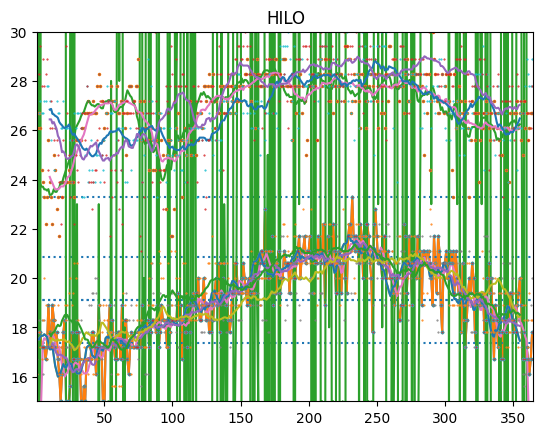

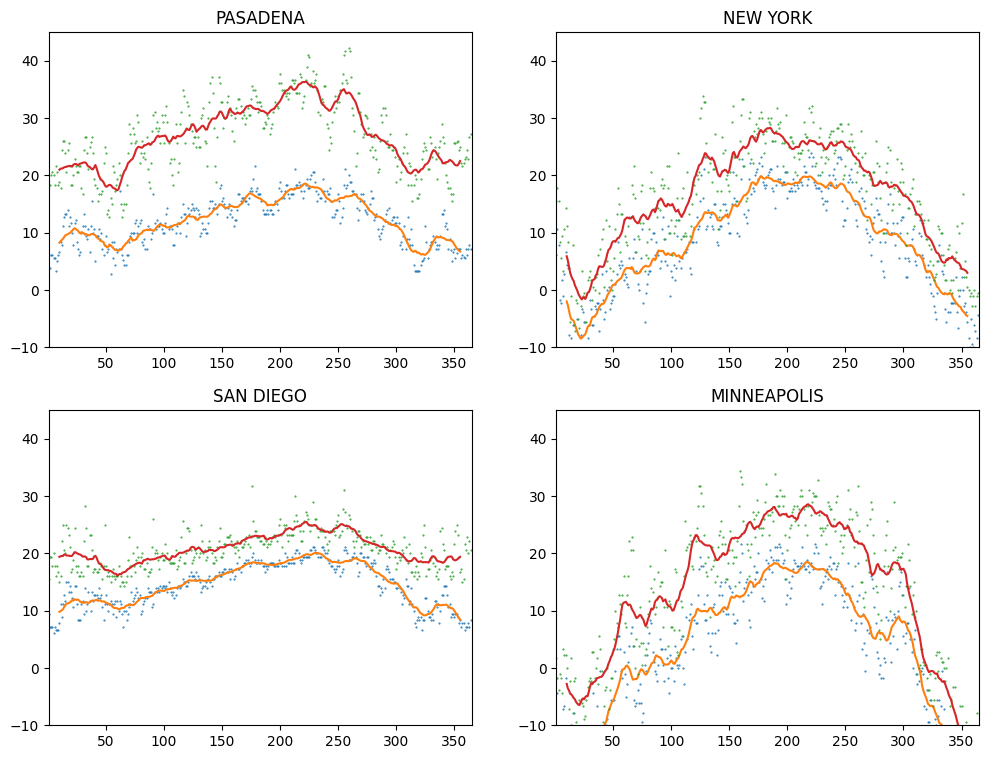

In [17]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

import getweather

# Fill missing values (NaNs) in an array
def fillnans(array):
    x = np.arange(len(array))
    good = ~np.isnan(array)
    return np.interp(x, x[good], array[good])

# Load HILO station data for 2000
hilo = getweather.getyear('HILO', ['TMIN', 'TMAX'], 2000)

# Fill NaN values in TMIN and TMAX
hilo['TMIN'], hilo['TMAX'] = fillnans(hilo['TMIN']), fillnans(hilo['TMAX'])

# Compute mean, min, and max of TMIN
np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])

# Plot TMIN with horizontal lines for mean, min, and max
pp.plot(hilo['TMIN'])
for value in [np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])]:
    pp.axhline(value, linestyle=':')

# Calculate mean and standard error
mean, err = np.mean(hilo['TMIN']), math.sqrt(np.var(hilo['TMIN']))

# Plot TMIN with horizontal lines for mean and mean ± standard error
pp.plot(hilo['TMIN'])
for value in [mean, mean - err, mean + err]:
    pp.axhline(value, linestyle=':')

# Load precipitation data for HILO
rain = getweather.getyear('HILO', ['PRCP'], 2000)['PRCP']
pp.plot(rain)

# Demonstrate effects of smoothing with a triangular mask
x = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])
mask = np.array([0.05, 0.2, 0.5, 0.2, 0.05])
y = np.correlate(x, mask, 'same')

pp.plot(x, 'o')
pp.plot(y, 'x')

# Uniform smoothing mask
np.ones(10) / 10

# Smooth TMIN data with uniform mask (mode='same')
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'same'))

# Smooth TMIN data with uniform mask (mode='valid')
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'valid'))

# General smoothing function
def smooth(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

# Plot smoothed TMIN and TMAX data
pp.plot(hilo['TMIN'], '.', ms=3)
pp.plot(smooth(hilo['TMIN'], 10))

pp.plot(hilo['TMAX'], '.', ms=3)
pp.plot(smooth(hilo['TMAX'], 10))

# Function to smooth and plot data for a specific station and year
def plotsmooth(station, year):
    stationdata = getweather.getyear(station, ['TMIN', 'TMAX'], year)

    for obs in ['TMIN', 'TMAX']:
        stationdata[obs] = fillnans(stationdata[obs])

        # Thinner points
        pp.plot(stationdata[obs], '.', ms=1)
        pp.plot(range(10, 356), smooth(stationdata[obs], 20))

    pp.title(station)
    pp.axis(xmin=1, xmax=365, ymin=-10, ymax=45)

# Plot smoothed data for multiple years for HILO
plotsmooth('HILO', 2000)
plotsmooth('HILO', 2001)
plotsmooth('HILO', 2002)

pp.axis(ymin=15, ymax=30)

# Plot four cities in a 2x2 grid
pp.figure(figsize=(12, 9))

for i, city in enumerate(['PASADENA', 'NEW YORK', 'SAN DIEGO', 'MINNEAPOLIS']):
    pp.subplot(2, 2, i+1)
    plotsmooth(city, 2000)
